# Advanced Regression Assignment

In [72]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV

import datetime


import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data Understanding and Preparation

In [73]:
df.shape

(1460, 81)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [75]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [76]:
df.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [77]:
round(df.isnull().sum()/len(df.index),2).sort_values(ascending=False).head(10)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageType      0.06
GarageCond      0.06
GarageYrBlt     0.06
GarageFinish    0.06
dtype: float64

In [78]:
#'PoolQC','MiscFeature','Alley','Fence','FireplaceQu' columns are with very high number of null values. Let's drop the columns
df=df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

In [79]:
df.shape

(1460, 76)

In [80]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [81]:
df.drop_duplicates(keep='first')
#As we can see there are no duplicates present

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


<AxesSubplot:>

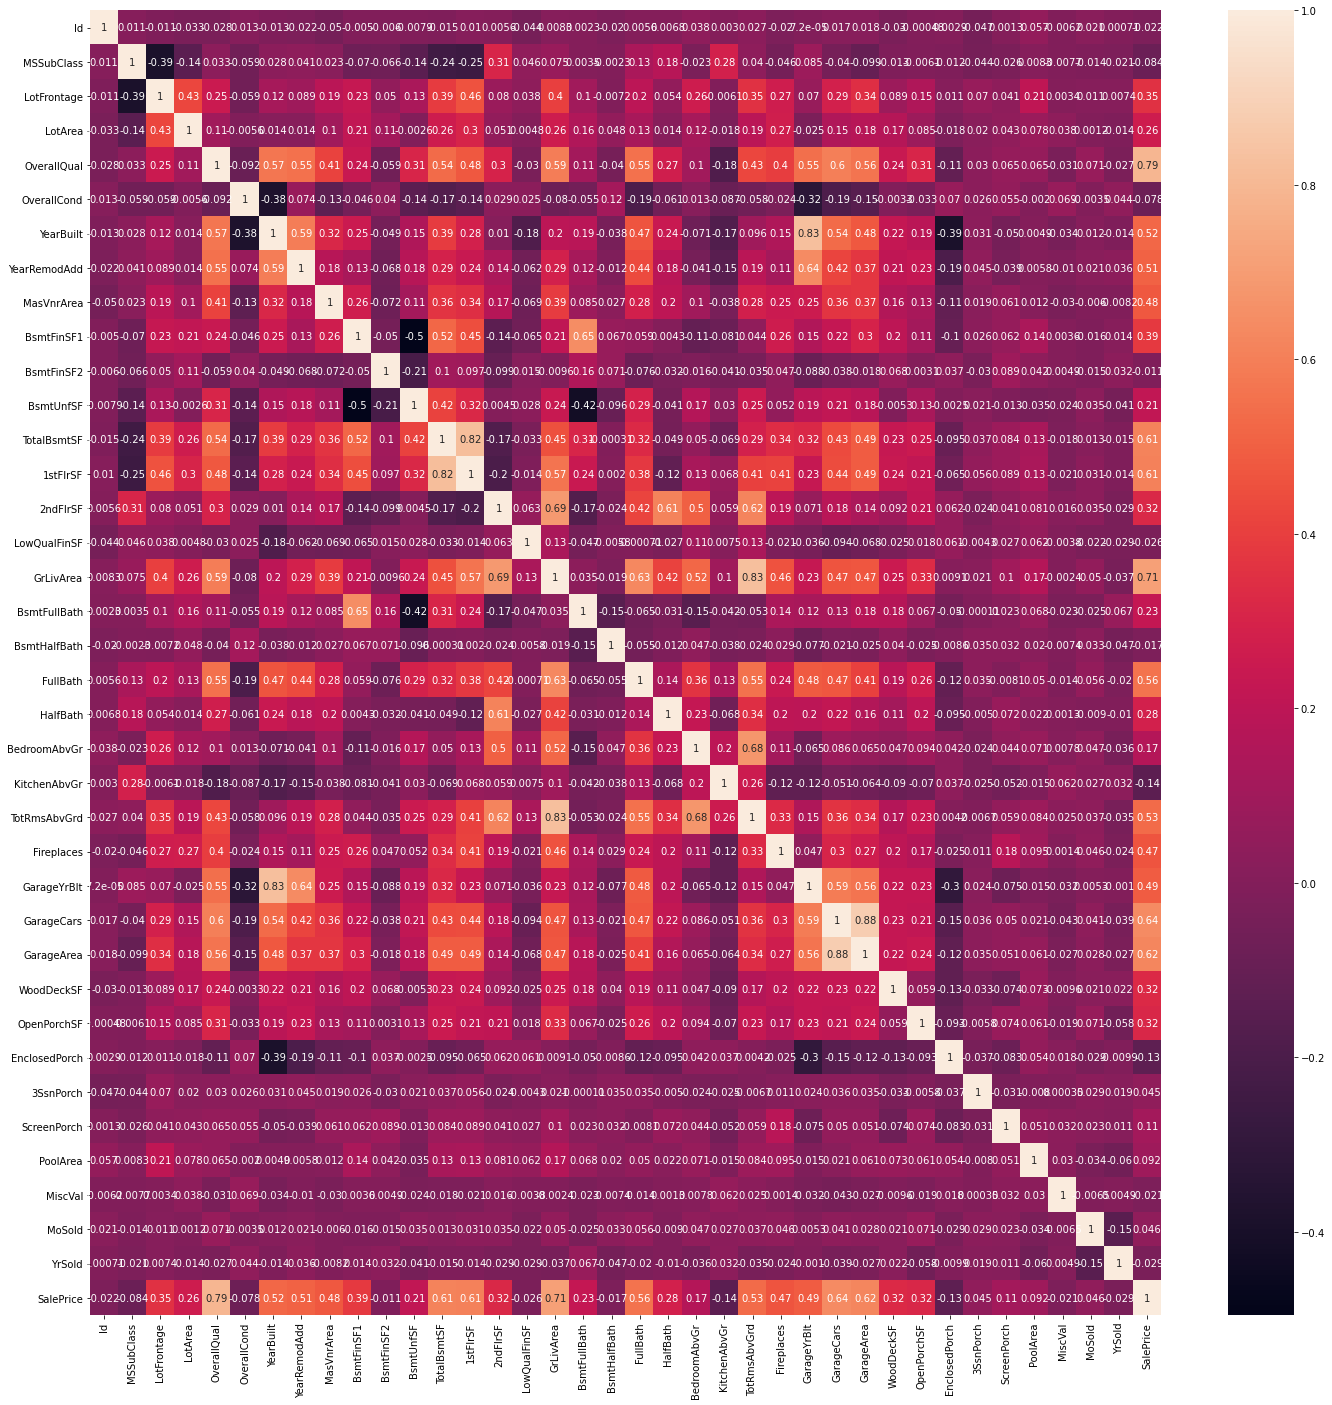

In [82]:
#Plotting correlating graph between the variables
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(),annot=True)

In [83]:
#Watching correlation of SalePrice with the remaining variables.
corr = df.corr()
corr = corr.SalePrice.sort_values(ascending=False)
corr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

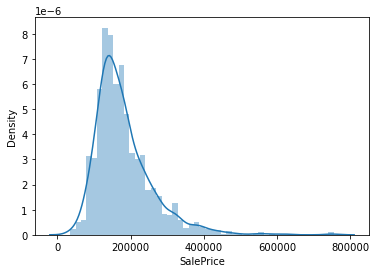

In [84]:
#Plotting distribution plot of SalePrice.
sns.distplot(df['SalePrice'])

In [85]:
#As these are float variables, we will check if any outliers are present;and if any, we will impute them with median or mean 
#depending on outliers.
df[['LotFrontage','MasVnrArea','GarageYrBlt']].describe()

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
max,313.000000,1600.000000,2010.000000


In [86]:
#Both 'LotFrontage' and 'MasVnrArea' have outliers, hence replace them median and for 'GarageYrBlt' with mean.
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median())
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())   
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())  

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

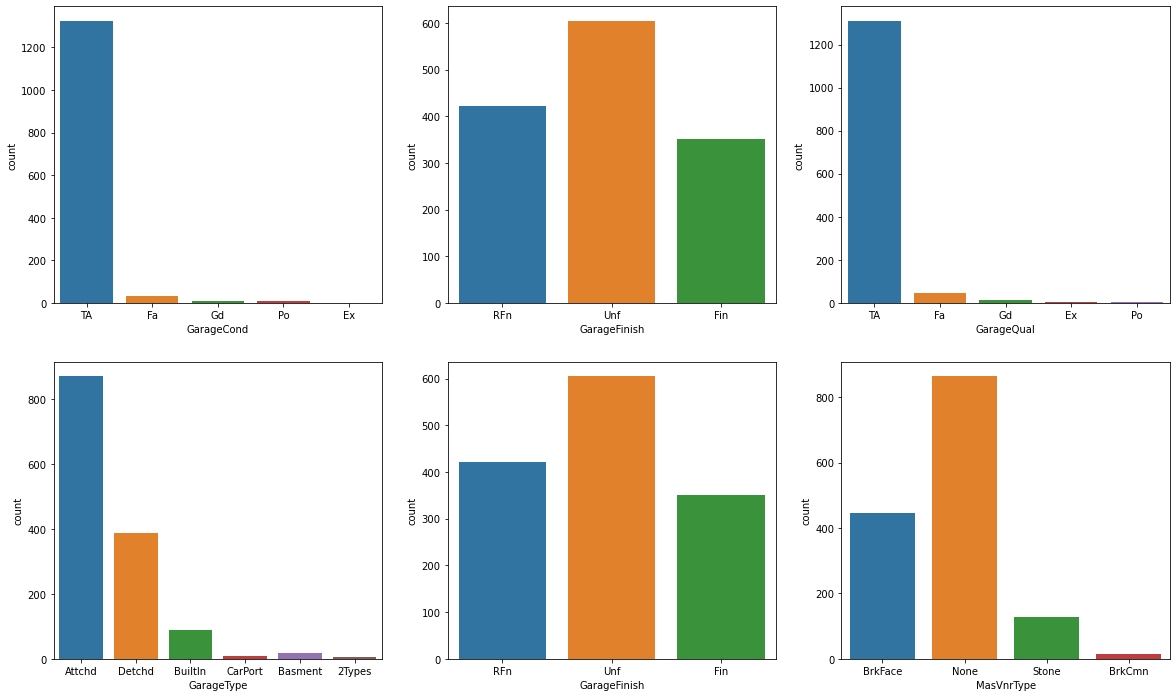

In [88]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageCond', data = df)

plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish',  data = df)

plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageType', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'GarageFinish',  data = df)
plt.subplot(2,3,6)
sns.countplot(x = 'MasVnrType', data = df)
plt.show()

In [89]:
df['MSSubClass']=df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',30:'1-STORY 1945 & OLDER',40:'1-STORY W/FINISHED ATTIC ALL AGES',
        45:'1-1/2 STORY - UNFINISHED ALL AGES',
        50:'1-1/2 STORY FINISHED ALL AGES',
        60:'2-STORY 1946 & NEWER',
        70:'2-STORY 1945 & OLDER',
        75:'2-1/2 STORY ALL AGES',
        80:'SPLIT OR MULTI-LEVEL',
        85:'SPLIT FOYER',
        90:'DUPLEX - ALL STYLES AND AGES',
       120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
       150:'1-1/2 STORY PUD - ALL AGES',
       160:'2-STORY PUD - 1946 & NEWER',
       180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

df['OverallQual']=df['OverallQual'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})
df['OverallCond']=df['OverallCond'].replace({ 10:'Very Excellent',
       9:'Excellent',
       8:'Very Good',
       7:'Good',
       6:'Above Average',
       5:'Average',
       4:'Below Average',
       3:'Fair',
       2:'Poor',
       1:'Very Poor'})

In [90]:
#'GarageType', 'GarageFinish', 'GarageCond','GarageQual','MasVnrType','Electrical' are nan because there is No Garage'. So replacing NANs with it.
df['GarageType'] = df['GarageType'].replace(np.nan, 'No Garage')
df['GarageFinish'] = df['GarageFinish'].replace(np.nan, 'No Garage')
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No Garage')
df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No Garage')
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'None') 
df['Electrical'] = df['Electrical'].replace(np.nan, 'SBrkr') 

In [91]:
#'BsmtExposure', 'BsmtFinType2', 'BsmtQual', 'BsmtFinType1', 'BsmtCond' are NAN when there is 'No Basement'. So replacing NANs with it
df['BsmtExposure'] = df['BsmtExposure'].replace(np.nan, 'No Basement')
df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No Basement')
df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No Basement')
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No Basement')
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No Basement')

In [92]:
missing_val = (df.isnull().sum() / df.isnull().count()*100).sort_values(ascending = False)
missing_val.head(10)

SalePrice      0.0
ExterCond      0.0
RoofStyle      0.0
RoofMatl       0.0
Exterior1st    0.0
Exterior2nd    0.0
MasVnrType     0.0
MasVnrArea     0.0
ExterQual      0.0
Foundation     0.0
dtype: float64

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

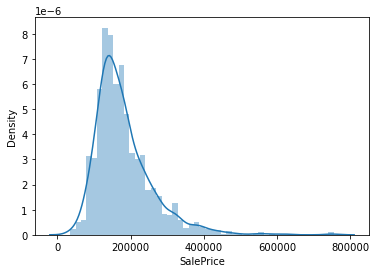

In [94]:
sns.distplot(df['SalePrice'])

In [95]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Data Transformation

In [96]:
#As 'SalePrice' has large no. of values, we will transform them into 'log' values.
df['SalePrice']=np.log(df.SalePrice)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

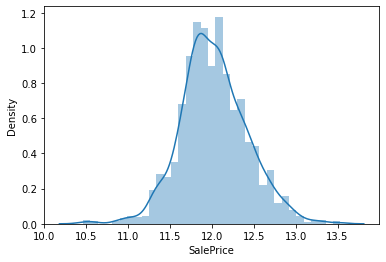

In [97]:
sns.distplot(df.SalePrice)

In [98]:
df['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

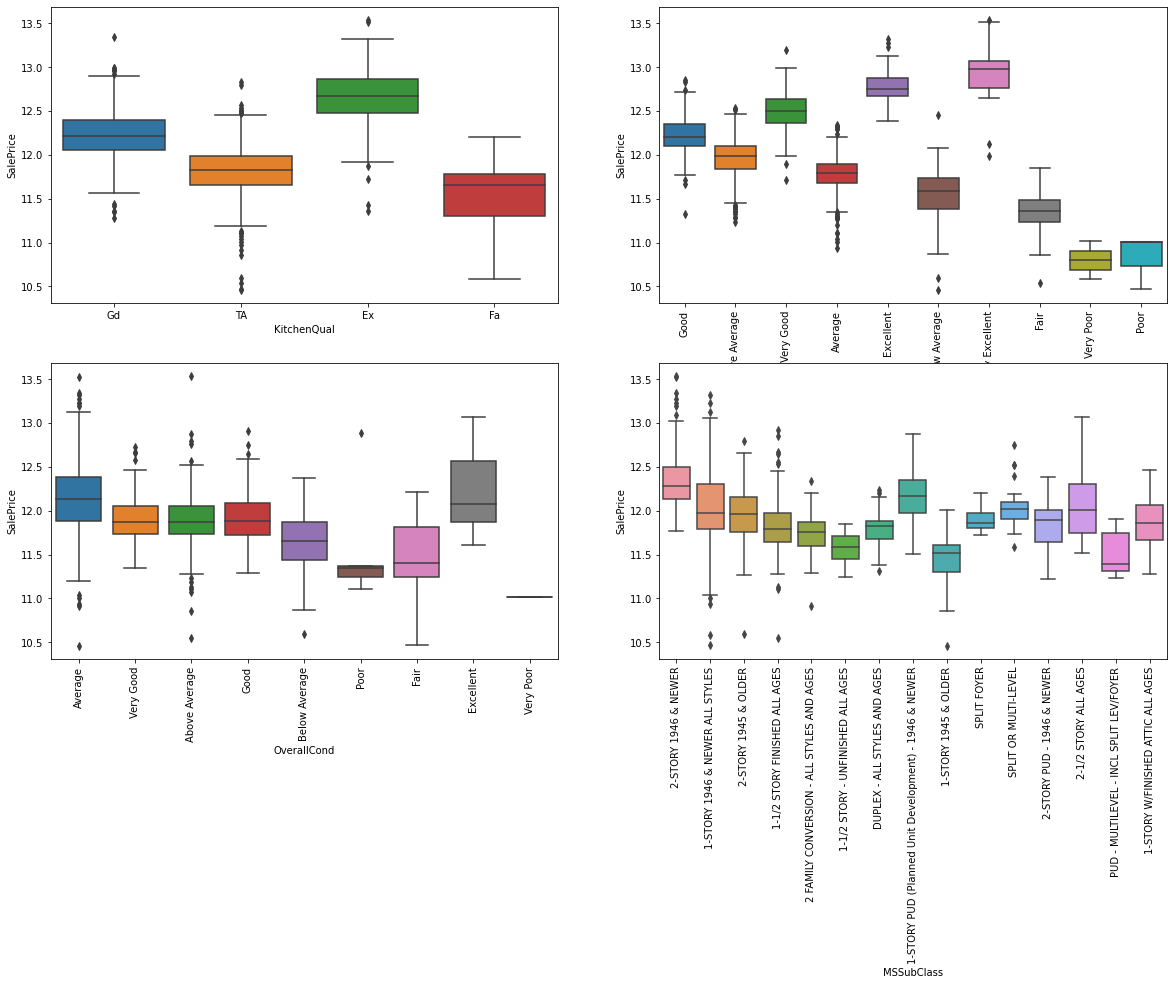

In [99]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x ='KitchenQual', y ='SalePrice', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = df)
plt.xticks(rotation=90)

plt.subplot(2,2,3)
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = df)
plt.xticks(rotation=90)

plt.subplot(2,2,4)
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df)
plt.xticks(rotation=90)

plt.show()

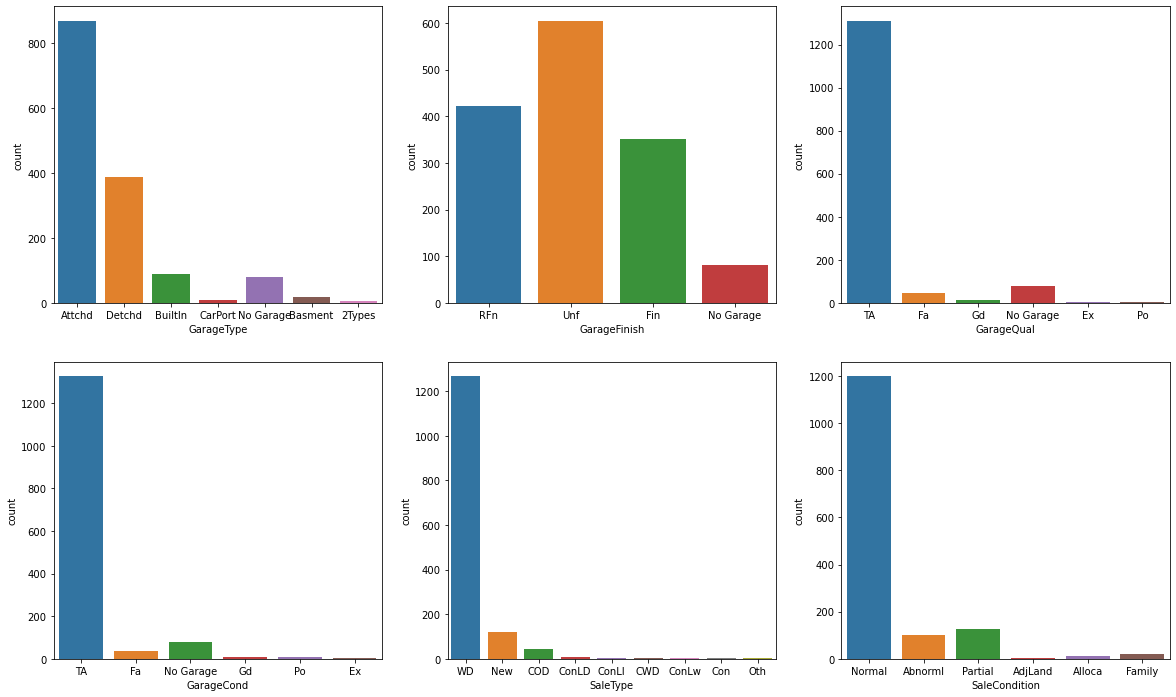

In [100]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'GarageType',  data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'GarageFinish', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'GarageCond', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'SaleType',  data = df)
plt.subplot(2,3,6)
sns.countplot(x = 'SaleCondition', data = df)
plt.show()

In [101]:
df['GarageType'] = df['GarageType'].replace(['Basment','CarPort','2Types'],'Others')
df['SaleCondition'] = df['SaleCondition'].replace(['Family','Alloca','AdjLand'],'Others')



# Dropping highly skewed column 
df.drop(['GarageQual','GarageCond','SaleType'],axis=1,inplace=True)

<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

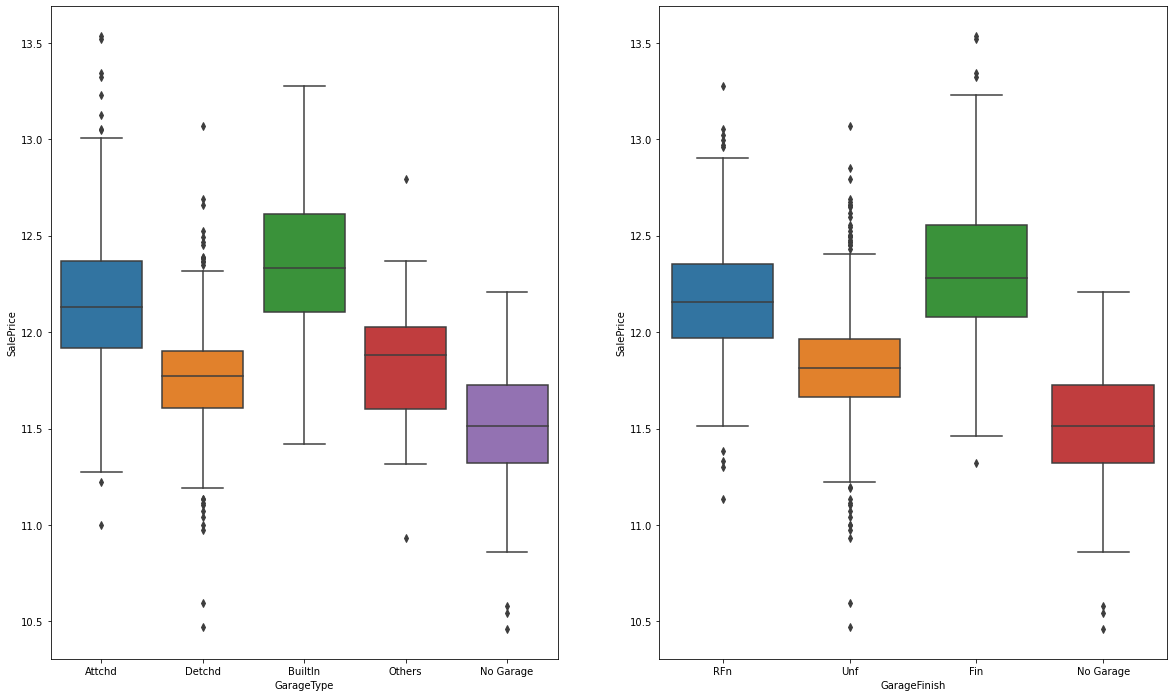

In [102]:
plt.figure(figsize=(20, 12))
plt.subplot(1,2,1)
sns.boxplot(x = 'GarageType', y ='SalePrice', data = df)
plt.subplot(1,2,2)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df)

In [103]:
#identify numerical and non-numerical columns 
CatCols = []
NumCols = []

for col in list(df):
    if df[col].dtypes == 'object':
        CatCols.append(col)  
    else:
        NumCols.append(col)
print('Categorical columns:\n',CatCols)

print('Numerical columns:\n',NumCols)

Categorical columns:
 ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleCondition']
Numerical columns:
 ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 

In [104]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

<AxesSubplot:>

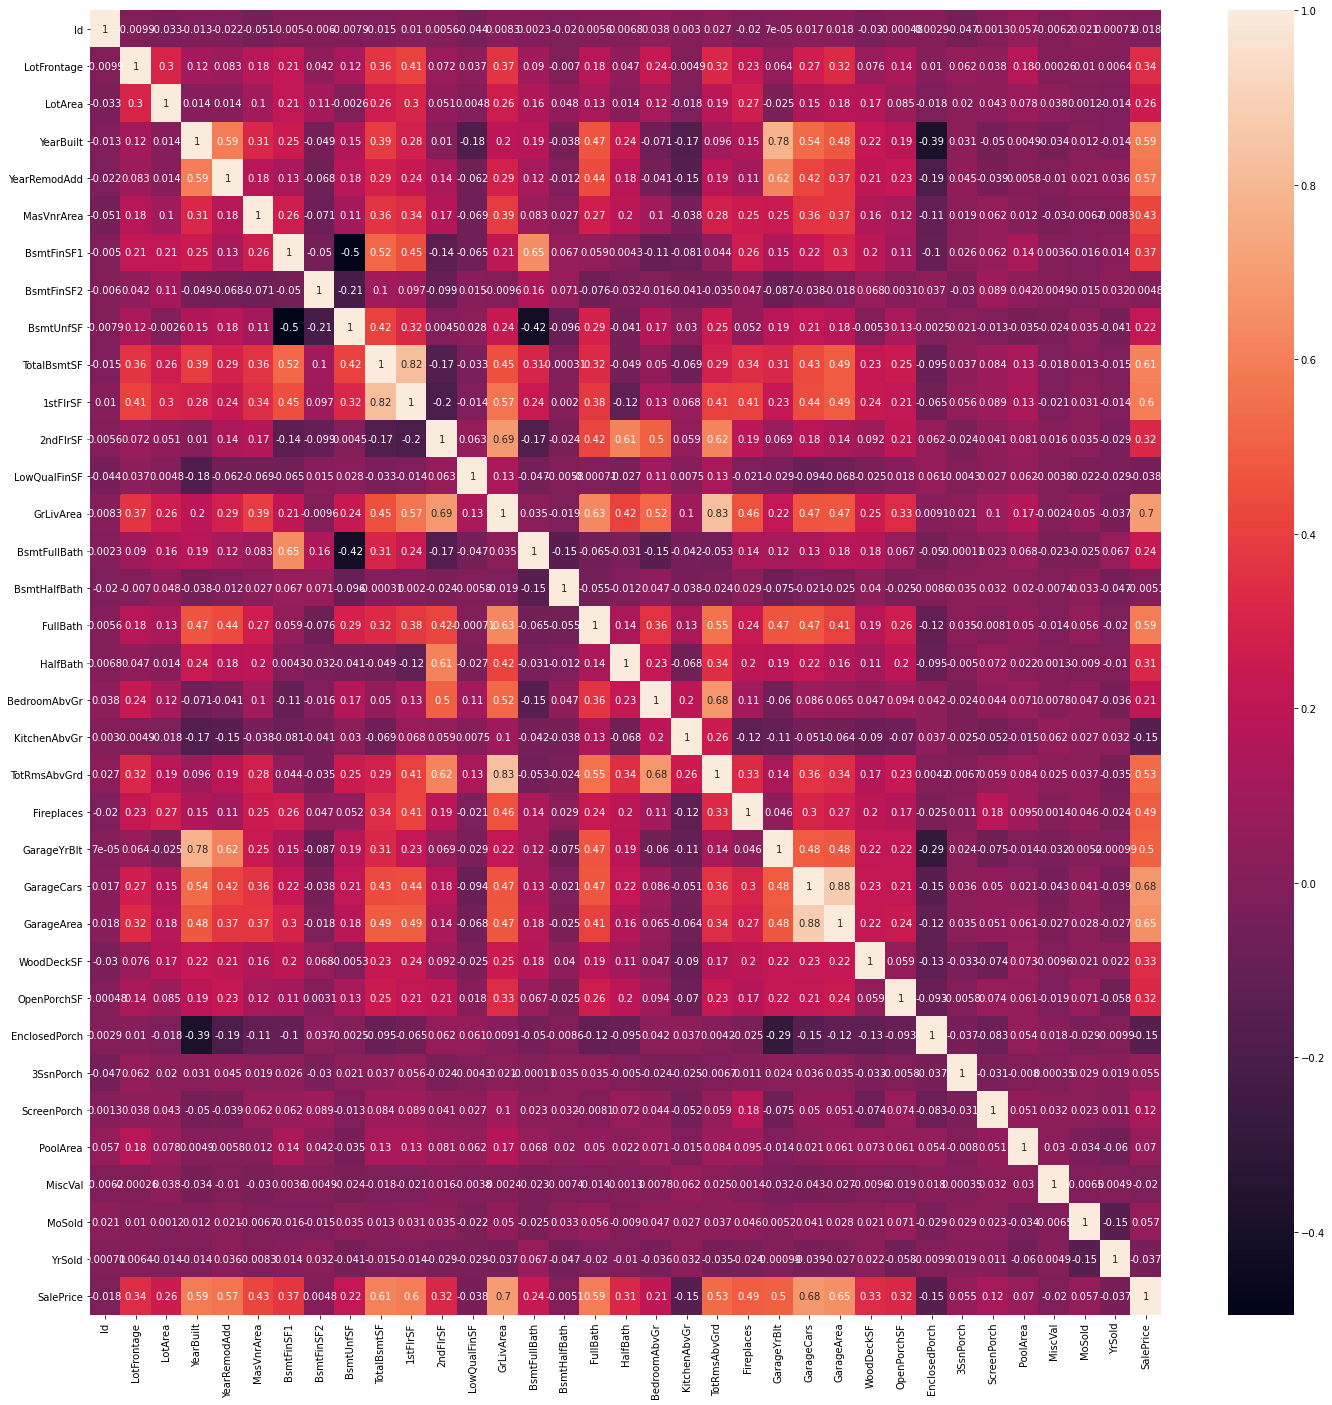

In [105]:
plt.figure(figsize=(24,24))
sns.heatmap(df.corr(),annot=True)

In [106]:
df.shape

(1460, 73)

In [107]:
#Dropping these variables as these don't have any effect on prediction
df=df.drop(['1stFlrSF', 'TotRmsAbvGrd', 'GarageArea'],axis=1)

In [108]:
#Derived Feature
#Getting the age of the houses
df['CurrentYear'] = datetime.datetime.now().year
df["Age"] = df['CurrentYear'] - df['YearBuilt']
df.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

Text(0, 0.5, 'SalePrice')

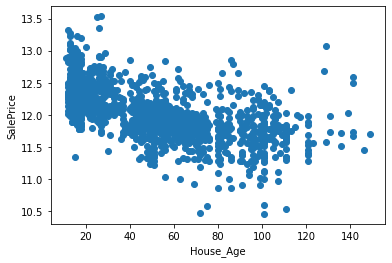

In [109]:
plt.scatter(x=df['Age'], y=df['SalePrice'])
plt.xlabel("House_Age")
plt.ylabel("SalePrice")

In [110]:
#regenerating list of numerical and non-numerical columns
CatCols = []
NumCols = []

for col in list(df):
    if df[col].dtypes == 'object':
        CatCols.append(col)  
    else:
        NumCols.append(col)
print('Categorical columns:\n',CatCols)

print('Numerical columns:\n',NumCols)

Categorical columns:
 ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'PavedDrive', 'SaleCondition']
Numerical columns:
 ['Id', 'LotFrontage', 'LotArea', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'Age']


In [111]:
df_dummy = pd.get_dummies(df[CatCols], drop_first=True)

In [112]:
df_concat = pd.concat([df, df_dummy], axis=1)
df_concat.shape

(1460, 284)

In [113]:

#Let's drop the original columns from where dummies are created
df_final = df_concat.drop(CatCols, axis = 1)
df_final.shape

(1460, 246)

In [114]:
df_final.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,1,65.0,8450,2003,196.0,706,0,150,856,854,...,0,0,0,1,0,0,1,1,0,0
1,2,80.0,9600,1976,0.0,978,0,284,1262,0,...,0,0,0,1,0,0,1,1,0,0
2,3,68.0,11250,2002,162.0,486,0,434,920,866,...,0,0,0,1,0,0,1,1,0,0
3,4,60.0,9550,1970,0.0,216,0,540,756,756,...,0,0,0,0,1,0,1,0,0,0
4,5,84.0,14260,2000,350.0,655,0,490,1145,1053,...,0,0,0,1,0,0,1,1,0,0


In [115]:
df_final.tail()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1455,1456,62.0,7917,2000,0.0,0,0,953,953,694,...,0,0,0,1,0,0,1,1,0,0
1456,1457,85.0,13175,1988,119.0,790,163,589,1542,0,...,0,0,0,0,1,0,1,1,0,0
1457,1458,66.0,9042,2006,0.0,275,0,877,1152,1152,...,0,0,0,1,0,0,1,1,0,0
1458,1459,68.0,9717,1996,0.0,49,1029,0,1078,0,...,0,0,0,0,1,0,1,1,0,0
1459,1460,75.0,9937,1965,0.0,830,290,136,1256,0,...,0,0,0,0,0,0,1,1,0,0


In [116]:
X = df_final.drop('SalePrice', axis=1)
y = df_final['SalePrice']

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)
X_train.head()



,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,211,67.0,5604,1950,0.0,468,0,396,864,0,...,1,0,1,0,0,0,1,1,0,0
318,319,90.0,9900,1993,256.0,987,0,360,1347,1274,...,0,0,0,1,0,0,1,1,0,0
239,240,52.0,8741,1950,0.0,94,0,641,735,689,...,0,0,0,0,1,0,1,1,0,0
986,987,59.0,5310,2003,0.0,0,0,485,485,634,...,0,0,0,0,1,0,1,1,0,0
1416,1417,60.0,11340,1950,0.0,0,0,777,777,1044,...,0,0,0,0,1,0,0,1,0,0


In [118]:
X_test.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1436,1437,60.0,9000,1971,0.0,616,0,248,864,0,...,0,0,0,0,1,0,1,1,0,0
57,58,89.0,11645,2004,0.0,0,0,860,860,860,...,0,0,0,1,0,0,1,1,0,0
780,781,63.0,7875,1996,38.0,0,0,1237,1237,0,...,0,0,0,0,0,0,1,1,0,0
382,383,79.0,9245,2006,0.0,0,0,939,939,858,...,0,0,0,1,0,0,1,1,0,0
1170,1171,76.0,9880,1977,0.0,522,0,574,1096,0,...,0,0,0,0,0,0,1,1,0,0


In [119]:
y_train.head()

210     11.492723
318     12.468437
239     11.635143
986     11.669929
1416    11.715866
Name: SalePrice, dtype: float64

In [120]:
y_test.head()

1436    11.699405
57      12.188418
780     12.078239
382     12.271392
1170    12.049419
Name: SalePrice, dtype: float64

In [121]:
scaler = StandardScaler()

In [122]:

#Scaling the numerical columns
NumCols1 = NumCols.copy()
NumCols1.remove('SalePrice')
X_train[NumCols1] = scaler.fit_transform(X_train[NumCols1])
X_train.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
210,-1.234868,-0.115302,-0.473765,-1.694350,-0.558025,0.043512,-0.293313,-0.374367,-0.430911,-0.787597,...,1,0,1,0,0,0,1,1,0,0
318,-0.980619,0.926898,-0.056845,0.390956,0.809137,1.160345,-0.293313,-0.454644,0.621579,2.140556,...,0,0,0,1,0,0,1,1,0,0
239,-1.166597,-0.794998,-0.169324,-1.694350,-0.558025,-0.761296,-0.293313,0.171964,-0.712011,0.795996,...,0,0,0,0,1,0,1,1,0,0
986,0.591959,-0.477806,-0.502297,0.875911,-0.558025,-0.963574,-0.293313,-0.175904,-1.256778,0.669584,...,0,0,0,0,1,0,1,1,0,0
1416,1.604247,-0.432493,0.082905,-1.694350,-0.558025,-0.963574,-0.293313,0.475233,-0.620490,1.611926,...,0,0,0,0,1,0,0,1,0,0


In [123]:
X_test[NumCols1] = scaler.transform(X_test[NumCols1])
X_test.head()

,Id,LotFrontage,LotArea,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,...,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_P,PavedDrive_Y,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
1436,1.651330,-0.432493,-0.144189,-0.675945,-0.558025,0.361992,-0.293313,-0.704396,-0.430911,-0.787597,...,0,0,0,0,1,0,1,1,0,0
57,-1.595054,0.881585,0.112505,0.924407,-0.558025,-0.963574,-0.293313,0.660317,-0.439628,1.189021,...,0,0,0,1,0,0,1,1,0,0
780,0.107002,-0.296554,-0.253368,0.536443,-0.355087,-0.963574,-0.293313,1.500998,0.381881,-0.787597,...,0,0,0,0,0,0,1,1,0,0
382,-0.829953,0.428455,-0.120412,1.021398,-0.558025,-0.963574,-0.293313,0.836481,-0.267481,1.184425,...,0,0,0,1,0,0,1,1,0,0
1170,1.025124,0.292515,-0.058786,-0.384972,-0.558025,0.159714,-0.293313,0.022559,0.074633,-0.787597,...,0,0,0,0,0,0,1,1,0,0


# Building Linear Regression Model

In [124]:
# Initiate  Linear Regression Object
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [125]:
# Printing  the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

7.793718166670198
[ 2.11964153e-04  1.05222205e-02  3.04243282e-02  2.23142113e-02
  4.76737986e-03 -2.01149027e+11 -7.39153058e+10 -1.94110387e+11
  1.98640473e+11  2.89916992e-03 -6.62231445e-03  1.41876221e-01
  1.29246712e-02  1.05667114e-03  9.42230225e-03  3.38745117e-03
 -1.29699707e-03 -2.10113525e-02  1.21917725e-02  1.44577026e-02
  2.58941650e-02  8.89205933e-03  5.18035889e-03  6.68334961e-03
  4.45556641e-03  8.52966309e-03  5.40161133e-03  1.80816650e-03
 -5.11169434e-04 -4.94384766e-03 -6.30073547e-02  1.88129425e-01
  1.04778290e-01  1.93125725e-01  1.68306828e-01  7.83901215e-02
  6.09699801e+11  7.02848434e-02  2.36233711e-01  1.88436508e-01
  8.29238892e-02 -4.97107711e+10  1.21359348e-01  2.09812164e-01
  1.32181168e-01  4.61040497e-01  4.23686981e-01  4.33338165e-01
  3.59778404e-01  9.68074799e-02  6.93702698e-03 -2.78472900e-03
  8.31222534e-03  3.20434570e-04 -6.63375854e-03  1.27849579e-02
 -1.47242546e-01  4.03785706e-02 -2.16531754e-02  7.45701790e-03
 -3.723

In [126]:
#Generating r2_score and other metrics 
from sklearn.metrics import r2_score,mean_squared_error
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9593735886097873
-5.272013424161322e+21
6.520223860592885
3.7994647397914696e+23
0.0063861154364278985
8.674577031487374e+20


 As we can see the train score is 0.95 and the test score is -5.27. The model has failed miserably on test data which is a case of overfitting. Hence we will go for Regularization by doing both Ridge and Lasso

# Ridge Regression

In [127]:
# List of Alphas to be tuned for Ridge Regression 
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,50, 100,500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    6.4s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [128]:
# The best hyperparameter alpha in the Ridge Regression
print(model_cv.best_params_)

{'alpha': 10.0}


In [129]:
#Generating Ridge coefficients for Alpha=10
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.19657319e-03 -8.26767718e-03  1.74307073e-02  2.82586450e-02
  5.71343688e-04 -4.06016622e-04  9.12084078e-03  6.78206164e-03
  9.61016891e-03  1.88439193e-02 -4.22879600e-03  1.21331916e-01
  2.45310970e-02  3.24241806e-03  2.69603602e-02  1.28249753e-02
  9.83548433e-03 -2.08144636e-02  2.43327760e-02 -1.57635100e-03
  4.71477282e-02  1.31377774e-02  1.04269939e-03  8.49138858e-03
  7.68134401e-03  1.11360937e-02 -1.58802986e-02  1.43566621e-04
 -1.76646072e-03 -7.24812280e-03 -4.29709710e-02  1.35679286e-02
 -6.09344417e-02  3.74341995e-02  3.27585102e-04  3.85987414e-04
  2.44905417e-03  3.73443185e-02  4.75475960e-02 -3.09337677e-02
 -6.47318411e-02  1.96093690e-02 -3.01434005e-02  2.14967286e-02
  4.29737186e-03  5.88828656e-02  4.35787377e-02  6.64785850e-02
  1.92049932e-02  3.09890261e-02  2.32780359e-02 -3.88207605e-02
  6.48675148e-03  3.60811408e-02  3.44365248e-02  4.28704284e-02
 -1.16119032e-02  4.19399936e-02 -3.16674696e-02 -8.34372429e-03
 -7.08769682e-03  1.51713

In [130]:
# Now we can calculate r2_score and other metrics for Ridge Regression

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9214848415555499
0.8796866066564453
12.601073833242001
8.67081433515542
0.012341894058023507
0.019796379760628813


Here in the Ridge Regression Analysis, we have reasonable score of train=0.92 and test=0.87 which is best in comparison with the Linear Regression.
Now lets do the Lasso Regression

# Lasso Regression

In [131]:
#Lasso Regression Analysis
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    6.3s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [132]:
# The best hyperparameter alpha for Lasso Regression 
print(model_cv.best_params_)

{'alpha': 0.001}


In [133]:
#Generating Lasso coefficients for Alpha=0.001

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [134]:
lasso.coef_

array([-0.00207319, -0.00591629,  0.01370195,  0.0331095 ,  0.0005472 ,
       -0.        ,  0.0032537 ,  0.00370637,  0.01807836,  0.        ,
       -0.00654174,  0.13746402,  0.02632521,  0.00465889,  0.02726746,
        0.01327448,  0.0067218 , -0.0239926 ,  0.02397776, -0.00170838,
        0.05018936,  0.01327594,  0.        ,  0.00726763,  0.00595226,
        0.01103425, -0.01757667, -0.        , -0.00046583, -0.00620226,
       -0.04265285,  0.        , -0.07627919,  0.03161767, -0.        ,
        0.        , -0.        ,  0.        ,  0.00703446, -0.01833145,
       -0.07881585,  0.        , -0.        ,  0.        ,  0.        ,
        0.00544441,  0.        ,  0.04539793, -0.        ,  0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
        0.01663104, -0.        ,  0.03903374, -0.        , -0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.01391489,  0.04185731,  0.        ,  0.10786912, -0.06

In [135]:
# Now we can calculate r2_score and other metrics for Lasso Regression

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9067436187413577
0.8727865621063035
14.96692573692668
9.168090685991432
0.014659084952915454
0.020931713894957606


Here in Lasso Regression, train score is 0.90 and test score is 0.87 which is reasonable when compared with Linear Regression model we first build.

In [136]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.593736e-01,0.921485,0.906744
1,R2 Score (Test),-5.272013e+21,0.879687,0.872787
2,RSS (Train),6.520224e+00,12.601074,14.966926
3,RSS (Test),3.799465e+23,8.670814,9.168091
4,MSE (Train),7.991317e-02,0.111094,0.121075
5,MSE (Test),2.945263e+10,0.140700,0.144678


In [137]:
betas = pd.DataFrame(index=X.columns)

In [138]:
betas.rows = X.columns

In [139]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [140]:
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
Id,2.119642e-04,-0.003197,-0.002073
LotFrontage,1.052222e-02,-0.008268,-0.005916
LotArea,3.042433e-02,0.017431,0.013702
YearRemodAdd,2.231421e-02,0.028259,0.033110
MasVnrArea,4.767380e-03,0.000571,0.000547
BsmtFinSF1,-2.011490e+11,-0.000406,-0.000000
BsmtFinSF2,-7.391531e+10,0.009121,0.003254
BsmtUnfSF,-1.941104e+11,0.006782,0.003706
TotalBsmtSF,1.986405e+11,0.009610,0.018078
2ndFlrSF,2.899170e-03,0.018844,0.000000


In [141]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.688),
 ('Id', -0.117),
 ('LotFrontage', -0.089),
 ('LotArea', -0.081),
 ('YearRemodAdd', -0.074),
 ('MasVnrArea', -0.065),
 ('BsmtFinSF1', -0.062),
 ('BsmtFinSF2', -0.061),
 ('BsmtUnfSF', -0.061),
 ('TotalBsmtSF', -0.061),
 ('2ndFlrSF', -0.06),
 ('LowQualFinSF', -0.056),
 ('GrLivArea', -0.05),
 ('BsmtFullBath', -0.048),
 ('BsmtHalfBath', -0.047),
 ('FullBath', -0.046),
 ('HalfBath', -0.045),
 ('BedroomAbvGr', -0.044),
 ('KitchenAbvGr', -0.043),
 ('Fireplaces', -0.043),
 ('GarageYrBlt', -0.043),
 ('GarageCars', -0.043),
 ('WoodDeckSF', -0.039),
 ('OpenPorchSF', -0.039),
 ('EnclosedPorch', -0.038),
 ('3SsnPorch', -0.037),
 ('ScreenPorch', -0.035),
 ('PoolArea', -0.034),
 ('MiscVal', -0.032),
 ('MoSold', -0.031),
 ('YrSold', -0.031),
 ('Age', -0.03),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.03),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.029),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.026),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER'

In [142]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list((zip(cols, model_parameters)))

[('constant', 11.756),
 ('Id', -0.175),
 ('LotFrontage', -0.081),
 ('LotArea', -0.079),
 ('YearRemodAdd', -0.076),
 ('MasVnrArea', -0.069),
 ('BsmtFinSF1', -0.056),
 ('BsmtFinSF2', -0.054),
 ('BsmtUnfSF', -0.048),
 ('TotalBsmtSF', -0.047),
 ('2ndFlrSF', -0.046),
 ('LowQualFinSF', -0.044),
 ('GrLivArea', -0.043),
 ('BsmtFullBath', -0.029),
 ('BsmtHalfBath', -0.024),
 ('FullBath', -0.024),
 ('HalfBath', -0.024),
 ('BedroomAbvGr', -0.023),
 ('KitchenAbvGr', -0.021),
 ('Fireplaces', -0.018),
 ('GarageYrBlt', -0.018),
 ('GarageCars', -0.018),
 ('WoodDeckSF', -0.014),
 ('OpenPorchSF', -0.013),
 ('EnclosedPorch', -0.011),
 ('3SsnPorch', -0.01),
 ('ScreenPorch', -0.009),
 ('PoolArea', -0.008),
 ('MiscVal', -0.007),
 ('MoSold', -0.006),
 ('YrSold', -0.006),
 ('Age', -0.006),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', -0.006),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.006),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', -0.006),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEW

 # We got a good score of train and test in both Ridge and Lasso regression.
 1. Ridge Regresssion:train_Score=0.92 and test_score=0.87
 2. Lasso Regression:train_score= 0.90 and test_score =0.87

# Optimal values for Ridge and Lasso Regression
1. The optimal value for Ridge Regression is 10.0
2. The optimal value for Lasso Regression is 0.001

# The top 5 significant variables in Ridge Regression are:
1. ('SaleCondition_Partial', 0.131)
2. ('SaleCondition_Others', 0.121)
3. ('SaleCondition_Normal', 0.094)
4. ('PavedDrive_Y', 0.09)
5. ('PavedDrive_P', 0.087)

# The top 5 significant variables in Lasso Regression are:
1. ('SaleCondition_Partial', 0.189)
2. ('SaleCondition_Others', 0.137)
3. ('SaleCondition_Normal', 0.112)
4. ('PavedDrive_Y', 0.108)
5. ('PavedDrive_P', 0.1)

# Final Conclusion
#### Based on the above model building, we will go with Lasso Regression as it helps in feature elimination by making some of the coefficients exaclty zero. 